In [12]:
from sklearn.svm import SVR, SVC
import os
import pandas as pd
import numpy as np
import sys
import openpyxl

from datetime import datetime
import datetime
from datetime import timedelta

from tqdm import tqdm

import matplotlib

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
# plt.rc('figure', figsize=(15,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
#판다스 컬럼 다보기
pd.set_option('display.max_columns', 100)

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
#elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    #plt.rc('font', family='Malgun Gothic')



# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [13]:
import pandas as pd
data = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/FINAL_약물전체추가(1:1.5).csv')
data = data.drop(columns=['등록번호'])
data.head()

,MFS,total_cci,키,몸무게,성별,나이,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,통증강도,욕창_행동,욕창_영양,낙상유무,Cluster_A,Cluster_B,Cluster_C,Cluster_D,Cluster_E,Cluster_F,Cluster_G,Cluster_H,Cluster_I,Cluster_J,Cluster_K,Cluster_L,Cluster_M,Cluster_N,Cluster_O,Cluster_P,Cluster_Q,Cluster_R,Cluster_S,Cluster_T,Cluster_U,ADL_전문,ADL_위험,욕창_기동력
0,50.0,0.0,185.3,110.3,0,28.0,0,0,0,0,0,8.000000,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,1.8,185.3,101.8,0,35.9,0,1,1,0,0,0.000000,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,171.0,101.0,0,31.0,2,0,1,0,0,0.000000,2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,1.0,179.0,98.4,0,44.0,0,0,0,0,0,3.857143,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.0,0.0,169.1,97.0,0,44.9,0,1,1,0,0,5.000000,3,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x = data.drop(columns=['낙상유무'])
y = data['낙상유무']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=10)
lr_model.fit(x_train, y_train)

# predict probabilities
lr_probs = lr_model.predict_proba(x_test)

#keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]


# predict
lr_y_train_pred = lr_model.predict(x_train)
lr_y_test_pred = lr_model.predict(x_test)

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
svm_model = SVC(kernel='linear', gamma='scale', C=0.1, probability=True, random_state=10)
svm_model.fit(x_train, y_train)
svm_y_test_pred = svm_model.predict(x_test)
# # predict probabilities
svm_probs = svm_model.predict_proba(x_test)

# #keep probabilities for the positive outcome only
svm_probs = svm_probs[:,1]

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train)
dt_y_test_pred = dt_model.predict(x_test)

# predict probabilities
dt_probs = dt_model.predict_proba(x_test)

#keep probabilities for the positive outcome only
dt_probs = dt_probs[:,1]

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(x_train, y_train)
rf_y_test_pred = rf_model.predict(x_test)


#predict probabilities
rf_probs = rf_model.predict_proba(x_test)

#keep probabilities for the positive outcome only
rf_probs = rf_probs[:,1]

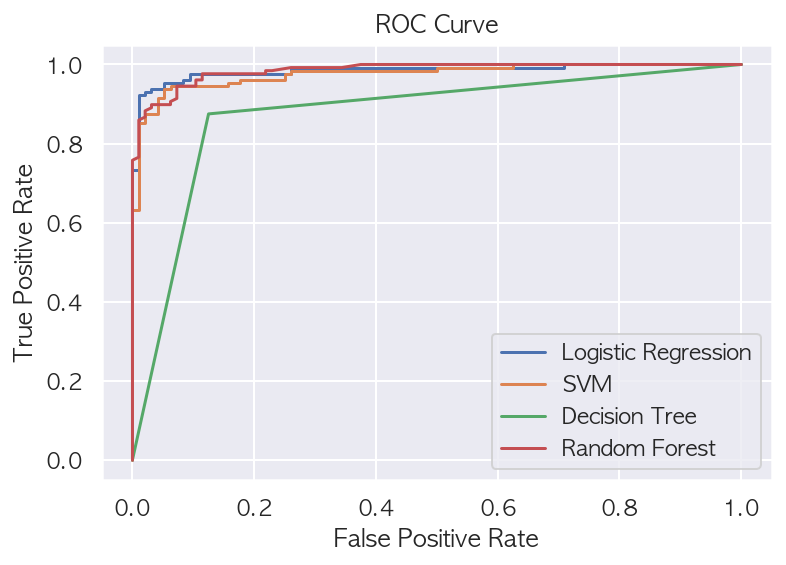

In [20]:
from sklearn import metrics

#set up plotting area
plt.figure(0).clf()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#logistic regression model and plot ROC curve
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_probs)
auc = round(metrics.roc_auc_score(y_test, lr_probs), 4)
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression")

# SVM and plot ROC curve
svm_fpr, svm_tpr, svm_thresholds = metrics.roc_curve(y_test, svm_probs)
auc = round(metrics.roc_auc_score(y_test, svm_probs), 4)
plt.plot(svm_fpr,svm_tpr,label="SVM")

# DT and plot ROC curve
dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(dt_fpr,dt_tpr,label="Decision Tree")

# SVM and plot ROC curve
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_probs)
auc = round(metrics.roc_auc_score(y_test, rf_probs), 4)
plt.plot(rf_fpr,rf_tpr,label="Random Forest")


#add legend
plt.legend()